In [28]:
# Libraries used
%matplotlib inline
from pymongo import MongoClient
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.style as style
import cartopy.crs as ccrs
from cartopy.feature import BORDERS
import cartopy

In [47]:
# Importing data from mongoDB
def imp_from_mongodb(year):
    client = MongoClient ('localhost', 27017)
    db = client['companies']
    cur = db.companies.find({'founded_year': {'$gt': year }},
                                {'name':1, 'founded_year': 1, '_id': 0, 'number_of_employees':1,
                                 'offices.latitude':1, 'offices.longitude':1, 'funding_rounds.raised_amount':1, 
                                 'funding_rounds.raised_currency_code':1, 'category_code':1, 'total_money_raised':1}) 
    comp_data = pd.DataFrame(cur)
    return comp_data

# Get latitude 
def get_lat(coord): 
    try: 
        return coord[0]['latitude']
    except:
        return None

# Get longitude    
def get_long(coord): 
    try: 
        return coord[0]['longitude']
    except:
        return None

# Inserting new columns with latitude and longitude    
def insert_latlong(comp_d):   
    comp_d['latitude'] = comp_d['offices'].apply(get_lat)
    comp_d['longitude'] = comp_d['offices'].apply(get_long)
    coords = list(zip(comp_d['longitude'], comp_d['latitude']))
    
    comp_d['coord'] = coords
    comp_d.head()
    return comp_d

# Get funding amount
def get_raised(funding): 
    try: 
        return funding[0]['raised_amount']
    except:
        return None

# Get currency    
def get_currency(funding): 
    try: 
        return funding[0]['raised_currency_code']
    except:
        return None

# Inserting new columns with funding and currency    
def insert_funding(funding):   
    funding['raised_amount'] = funding['funding_rounds'].apply(get_raised)
    funding['raised_currency_code'] = funding['funding_rounds'].apply(get_currency)
    return funding

# Dropping columns with dictionaries in them and none values on important columns
def col_drop(data):
    data = data.drop(['offices', 'funding_rounds'], axis=1)
    data = data.dropna(axis=0, subset=['latitude'])
    data = data.dropna(axis=0, subset=['longitude'])
    data = data.dropna(axis=0, subset=['number_of_employees'])
    return data

# Creating world map with all the data
def world_map(clean_data):
    wmap = plt.figure(figsize=(15, 10))
    ax = wmap.add_subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.scatter(clean_data['longitude'],clean_data['latitude'], alpha=0.7, s=3, c= '#B44259')
    
# Creating US map with the data
def us_map(clean_data):
    usmap = plt.figure(figsize=(15, 15))
    ax = usmap.add_subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.scatter(clean_data['longitude'],clean_data['latitude'], alpha=0.7, s=5, c= '#B44259')
    ax.set_xlim(-128, -45)
    ax.set_ylim(22, 53)
    
    
# Creating EU map with the data
def eu_map(clean_data):
    usmap = plt.figure(figsize=(15, 15))
    ax = usmap.add_subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.scatter(clean_data['longitude'],clean_data['latitude'], alpha=0.7, s=5, c= '#B44259')
    ax.set_xlim(-15, 25)
    ax.set_ylim(35, 62)
    
# Creating India map with the data
def ind_map(clean_data):
    usmap = plt.figure(figsize=(15, 15))
    ax = usmap.add_subplot(1, 1, 1,projection=ccrs.PlateCarree(central_longitude=0))
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.scatter(clean_data['longitude'],clean_data['latitude'], alpha=0.7, s=5, c= '#B44259')
    ax.set_xlim(68, 89)
    ax.set_ylim(5, 31)
    
# Exporting dataset and images
def export(clean_data):
    wm = world_map(clean_data)
    plt.savefig('world_map.png')
    usm = us_map(clean_data)
    plt.savefig('us_map.png')
    eum = eu_map(clean_data)
    plt.savefig('eu_map.png')
    indm = ind_map(clean_data)
    plt.savefig('ind_map.png')
    clean_data.to_json('clean_data.json', orient='records', lines=True)

,category_code,founded_year,name,number_of_employees,total_money_raised,latitude,longitude,coord,raised_amount,raised_currency_code
0,web,2006,Geni,18.0,$16.5M,34.090368,-118.393064,"(-118.393064, 34.090368)",1500000.0,USD
2,news,2007,Scribd,50.0,$25.8M,37.789634,-122.404052,"(-122.404052, 37.789634)",12000.0,USD
3,social,2007,MeetMoi,15.0,$5.58M,40.757929,-73.985506,"(-73.985506, 40.757929)",1500000.0,USD
5,games_video,2006,Joost,0.0,$45M,40.746497,-74.009447,"(-74.0094471, 40.7464969)",45000000.0,USD
6,social,2006,Twitter,1300.0,$1.16B,37.776805,-122.416924,"(-122.4169244, 37.7768052)",5000000.0,USD
7,search,2006,Powerset,60.0,$22.5M,37.778613,-122.395289,"(-122.395289, 37.778613)",12500000.0,USD
9,web,2007,Mahalo,40.0,$21M,34.017606,-118.487267,"(-118.487267, 34.017606)",5000000.0,USD
10,games_video,2006,Kyte,40.0,$23.4M,37.788482,-122.409173,"(-122.409173, 37.788482)",2250000.0,USD
11,advertising,2008,OpenX,305.0,$75.5M,34.149471,-118.132747,"(-118.1327468, 34.1494713)",5000000.0,USD
14,games_video,2006,Stickam,35.0,$0,34.051409,-118.254558,"(-118.254558, 34.051409)",NaN,None


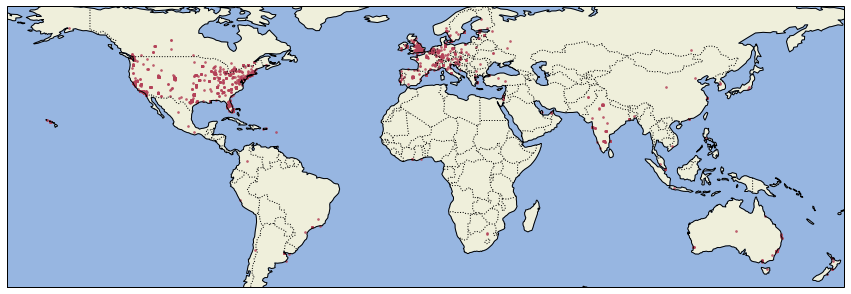

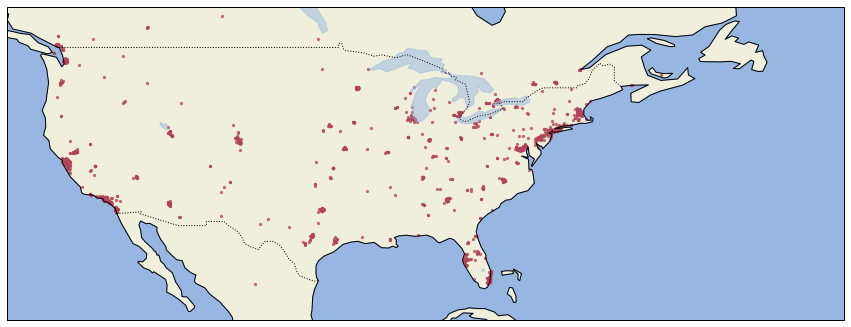

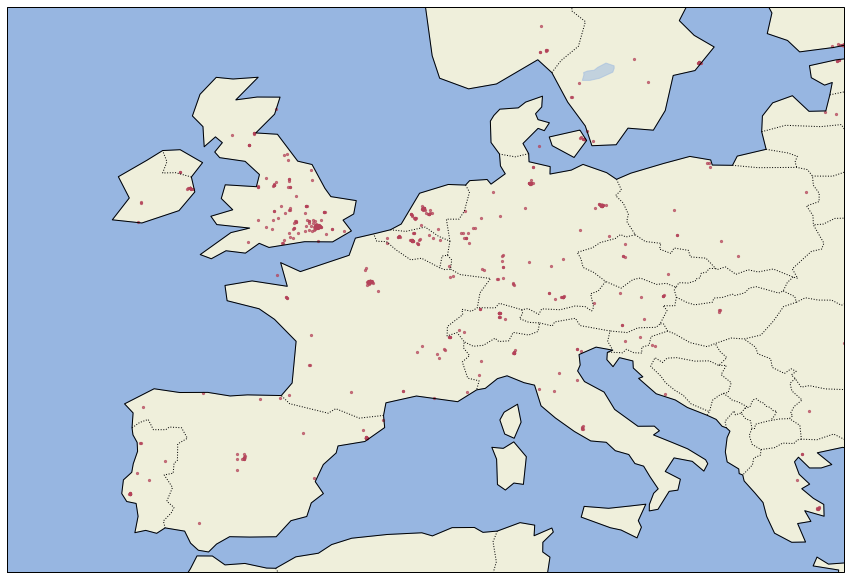

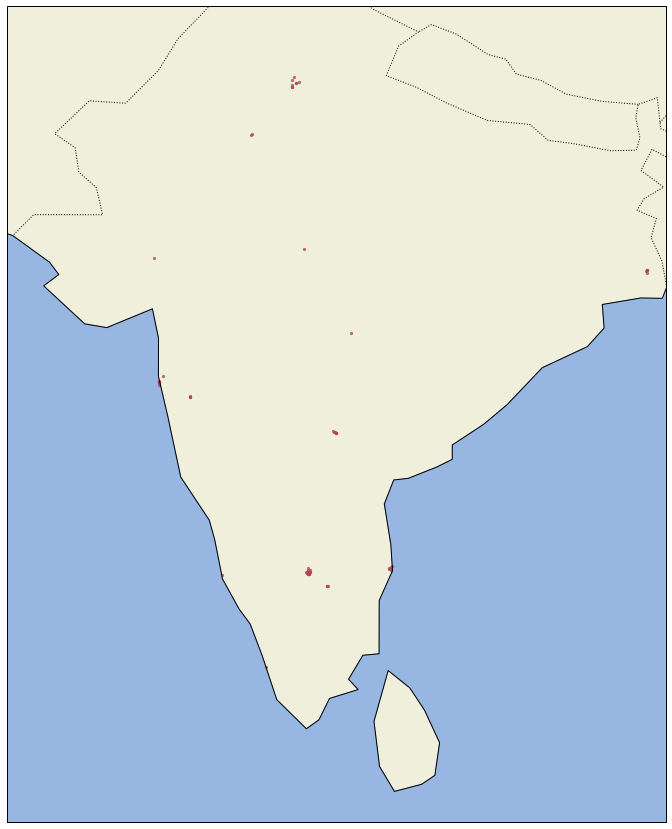

In [48]:
# Main Code
if __name__ == '__main__':
    companies_data = imp_from_mongodb(2005)
    data_location = insert_latlong(companies_data)
    data_loc_fund = insert_funding(data_location)
    clean_data = col_drop(data_loc_fund)
    export(clean_data)
    display(clean_data.head(100))

In [27]:
client = MongoClient ('localhost', 27017)
db = client['companies']
    
nearLocation = {
    "lng": 40.717432,
    "lat": -73.994943
}

comps = pd.DataFrame(db.companies.find({
    "offices.coord": {
     "$near": {
       "$geometry": {
          "type": "Point" ,
          "coordinates": [ nearLocation["lat"] , nearLocation["lng"] ]
       },
       "$maxDistance": 2000, # In meters
     }
   }
}))


comps.head()



OperationFailure: error processing query: ns=companies.companiesTree: GEONEAR  field=offices.coord maxdist=2000 isNearSphere=0
Sort: {}
Proj: {}
 planner returned error: unable to find index for $geoNear query